<a href="https://colab.research.google.com/github/mhtattersall/Dask/blob/main/Dask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DASK is a parallel computing library for Python. DASK enables programmers to have more control over the way that a program is compiled and run. In this mini-lesson you will learn the basics of DASK.

DASK is useful for processing big data collections. DASK allows for large arrays and dataframes that normally wouldn’t fit in-memory to be processed in parallel. DASK is a preferred alternative to NumPy and pandas as these libraries cannot handle big data when the data is too large to fit in-memory (Dask Developers 2018).

DASK is a dynamic task scheduler. DASK allows the programmer to identify specific tasks to be computed in parallel. The execution engine can do so on big data collections or on user-defined workloads. The use of DASK can replace other threading and multi-core processing libraries as DASK works to use small amounts of memory and process tasks with low latency (Dask Developers 2018).

In [ ]:
# Step 1: Install the complete Dask suite
!pip install "dask[complete]"

# Step 2: Import Dask to verify the installation
import dask
print(dask.__version__)


A major advantage of using DASK is that DASK allows for big data files to be read quickly.  After running the above command, you will be prompted to choose a file from your local device.

In [ ]:
from google.colab import files
uploaded = files.upload()
import dask.dataframe as dd
%time df = dd.read_csv("dataset.csv", encoding = 'ISO-8859-1')

Saving dataset.csv to dataset.csv
CPU times: user 24.5 ms, sys: 2.46 ms, total: 27 ms
Wall time: 69.6 ms


DASK also allows for task visualization. This can help users to understand how tasks are being processed, and it is also useful when debugging code. Run the code below to try out a sample visualization to see how useful the feature is:

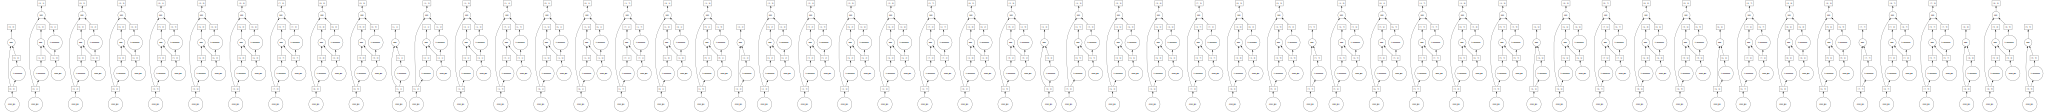

In [ ]:
import dask.array as da
x = da.ones((50, 50), chunks=(5, 5))

y = x + x.T

y.visualize(filename='transpose.svg')

##Running Tasks in Parallel with DASK

In addition to the ability to load and process large datasets, DASK also provides the ability to program specific independent tasks to run in parallel. This is helpful, as a task can be programmed and a specific function can be labeled as a task. To do so, annotate the function with @Delayed, which indicates to DASK that you wish for this function to be executed at a specific desired time.

The most optimal way to compute this is to break up the problem into a numerator and denominator. The two variables are independent of each other because you can calculate one without knowing the result of the other. Therefore, you know the program will run more quickly if you can compute both the numerator and denominator at the same time and then simply divide the result.

![](https://drive.google.com/uc?export=view&id=1b1SED0QHVNHBZsV5Uu-EdBLDEccrxi1I)

In [ ]:
from dask import delayed

@delayed
def Numerator(x,y):
 sum = 0
 for i in range(1, y+1):
   sum = sum + (i * x)
 return sum

@delayed
def Denominator(y):
 factorial = 1
 for i in range(y,1, -1):
   factorial = i* factorial
 return factorial


def Divide(numerator, denominator):
 return numerator / denominator


numerator = delayed(Numerator)(1500,10)
denominator = delayed(Denominator)(10)
result = delayed(Divide)(numerator, denominator)
result.compute()

0.02273478835978836

If you execute the result.visualize()function, you can see exactly what DASK is doing in the background.

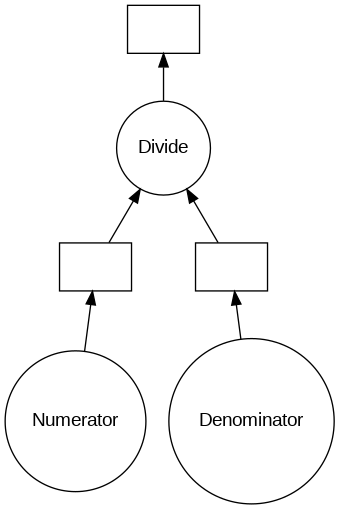

In [ ]:
result.visualize()

As expected, DASK handles the two tasks independently and then divides the result. Instead of waiting for your CPU to finish calculating the result of the numerator and then getting started on the denominator, DASK calculates both variables simultaneously to save valuable time. This is one of many powerful advantages of parallel computing. Try exploring some examples on your own to get more familiar with the software. As you practice using DASK more, it can be fun to challenge yourself and explore new ways to speed up an application.